____

# <font color=#FFAA11> Two-Temperature Model </font>

The TTM considered here is given by
$$\begin{align}
c_e \frac{\partial T_e}{\partial t} &= \frac{1}{r}\frac{\partial}{\partial r}\left(r k_e \frac{\partial T_e}{\partial r}\right) - G (T_e - T_i), \\
c_i\frac{\partial T_i}{\partial t} &= \frac{1}{r}\frac{\partial}{\partial r}\left(r k_i \frac{\partial T_i}{\partial r}\right) + G (T_e - T_i),
\end{align}
$$

which assumes a cylindrical plasma composed of electrons and ions with no mass flow. 

Main areas where major improvements are needed:
1. Plasma Formulary version of parameters
2. Allow density variation 
3. Nicer visualizations, including animations, would be nice to have in the long run.

Current Bug- Electron Heat Capacity definitely not right!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from physics import JT_GMS, SMT
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from exp_setup import Cylindrical_Grid, Experiment
from TTM_solver import TwoTemperatureModel


# Create Experimental Information

In [2]:
grid  = Cylindrical_Grid(200e-6) 
Zstar, A = 18, 40
Te_initial, Ti_initial = 18000, 10300 #[K]
laser_width = 50e-6 # [m]
n0 = 6.3e26

# Create Experimental layout and TTM solver
Argon_jt = Experiment(grid, n0, Zstar, A, Te_initial, Ti_initial,laser_width, gas_name='Argon', model = "JT")
ttm_jt = TwoTemperatureModel(Argon_jt, model = "JT")

Argon_smt = Experiment(grid, n0, Zstar, A, Te_initial, Ti_initial,laser_width, gas_name='Argon', model = "SMT")
ttm_smt = TwoTemperatureModel(Argon_smt, model = "SMT")

Current Te profile not exact, needs self-consistency condition.
Current Te profile not exact, needs self-consistency condition.


In [3]:
print(Argon_jt.params.electron_thermal_conductivity(Argon_jt.n_e, Argon_jt.n_i, Argon_jt.m_i, Argon_jt.Zbar, Argon_jt.Te, Argon_jt.Ti)/JT_GMS.electron_heat_capacity(Argon_jt.n_e,Argon_jt.Te))
print(Argon_smt.params.electron_thermal_conductivity(Argon_smt.n_e, Argon_smt.n_i, Argon_smt.m_i, Argon_smt.Zbar, Argon_smt.Te, Argon_smt.Ti)/SMT.electron_heat_capacity(Argon_smt.n_e,Argon_smt.Te))

[2.05304673e-04 2.03548695e-04 1.98371117e-04 1.90035220e-04
 1.78954814e-04 1.65659894e-04 1.50754385e-04 1.34870677e-04
 1.18625726e-04 1.02582886e-04 8.72225278e-05 7.29231692e-05
 5.99534018e-05 4.84736866e-05 3.85461544e-05 3.01500248e-05
 2.32001262e-05 1.75661954e-05 1.30910717e-05 9.60645413e-06
 6.94547000e-06 4.95181584e-06 3.48563557e-06 2.42657307e-06
 1.67457790e-06 1.14907888e-06 7.87097988e-07 5.40789661e-07
 3.74784023e-07 2.63606947e-07 1.89354409e-07 1.39718324e-07
 1.06396568e-07 8.38721462e-08 6.85157439e-08 5.79511685e-08
 5.06214977e-08 4.55005230e-08 4.19048533e-08 3.93733219e-08
 3.75901773e-08 3.63361849e-08 3.54572913e-08 3.48442718e-08
 3.44192579e-08 3.41266189e-08 3.39266475e-08 3.37910992e-08
 3.36999916e-08 3.36392844e-08 3.35991911e-08 3.35729488e-08
 3.35559275e-08 3.35449872e-08 3.35380195e-08 3.35336224e-08
 3.35308728e-08 3.35291691e-08 3.35281231e-08 3.35274867e-08
 3.35271031e-08 3.35268740e-08 3.35267384e-08 3.35266588e-08
 3.35266126e-08 3.352658

In [4]:
print("JT Model")
ttm_jt.make_times()
ttm_jt.print_timescales()

print("\nSMT Model")
ttm_smt.make_times()
ttm_smt.print_timescales()

JT Model

Simulation time: 9.3e-01 ns,  dt = 1.9e+01 ps, steps = 50
  Diffusion time (r_max): e:1.9e+05 ns, i:5.2e+45 ns 
  Diffusion time (dr): e:1.9e+01 ns, i:5.2e+41 ns 
  Thermalization Times: 2e+02 ps  2e+02 ps

SMT Model

Simulation time: 1.2e+00 ns,  dt = 2.3e+01 ps, steps = 50
  Diffusion time (r_max): e:7.3e+03 ns, i:5.2e+45 ns 
  Diffusion time (dr): e:7.3e-01 ns, i:5.2e+41 ns 
  Thermalization Times: 2e+02 ps  2e+02 ps


# Solve Two Temperature Model

In [6]:
JT_GMS.ei_relaxation_times(ttm_jt.n_e, ttm_jt.n_i,ttm_jt.experiment.m_i, ttm_jt.Zbar, ttm_jt.Te,ttm_jt.Ti)

(array([1.86155039e-10, 1.86355898e-10, 1.86963570e-10, 1.87993374e-10,
        1.89470954e-10, 1.91432438e-10, 1.93924623e-10, 1.97005134e-10,
        2.00742487e-10, 2.05215934e-10, 2.10514876e-10, 2.16737592e-10,
        2.23988863e-10, 2.32375965e-10, 2.42002354e-10, 2.52958239e-10,
        2.65307240e-10, 2.79068528e-10, 2.94194431e-10, 3.10544655e-10,
        3.27860207e-10, 3.45742623e-10, 3.63646841e-10, 3.80897606e-10,
        3.96737876e-10, 4.10411478e-10, 4.21271068e-10, 4.28889320e-10,
        4.33142554e-10, 4.34238444e-10, 4.32675063e-10, 4.29141659e-10,
        4.24391101e-10, 4.19120449e-10, 4.13887754e-10, 4.09076113e-10,
        4.04899406e-10, 4.01434463e-10, 3.98663162e-10, 3.96512119e-10,
        3.94883638e-10, 3.93676444e-10, 3.92797548e-10, 3.92167660e-10,
        3.91722504e-10, 3.91411867e-10, 3.91197625e-10, 3.91051481e-10,
        3.90952829e-10, 3.90886905e-10, 3.90843283e-10, 3.90814695e-10,
        3.90796137e-10, 3.90784202e-10, 3.90776599e-10, 3.907718

In [7]:
ttm_jt.solve_TTM(tmax=4.5e-9)
ttm_smt.solve_TTM(tmax=4.5e-9)

# PLOTS

In [8]:
def plot_temp_profiles(ttm, grid, plot_times = None, ax = None, title=''):

    if plot_times is None:
        plot_times = (np.linspace(0,len(ttm.t_list)*0.99,num=4,endpoint=True)).astype(int)  # Intermediate times for plotting        
        
    # Plot temperature profiles at intermediate times
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(14,10),facecolor='w')
    
    plot_idx = 0
    for plot_idx, ti in enumerate(plot_times):
        t = ttm_jt.t_list[ti]
        ax.plot(grid.cell_centers*1e6, ttm.Te_list[ti][:-1]*1e-3, '--', color=colors[plot_idx], label=f"$T_e$: t={t*1e9:.1e} [ns]")
        ax.plot(grid.cell_centers*1e6, ttm.Ti_list[ti][:-1]*1e-3, '-' , color=colors[plot_idx], label=f"$T_i$: t={t*1e9:.1e} [ns]")
        # plot_idx += 1


    # Plot settings
    ax.set_xlabel(r"Radial distance [$\mu$m]",fontsize=20)
    ax.set_ylabel("Temperature [kK]",fontsize=20)
    ax.tick_params(labelsize=20)
    # ax.set_ylim(0,10.1)
    ax.legend(fontsize=15)
    ax.grid(alpha = 0.3)
    ax.set_title(title, fontsize=20)


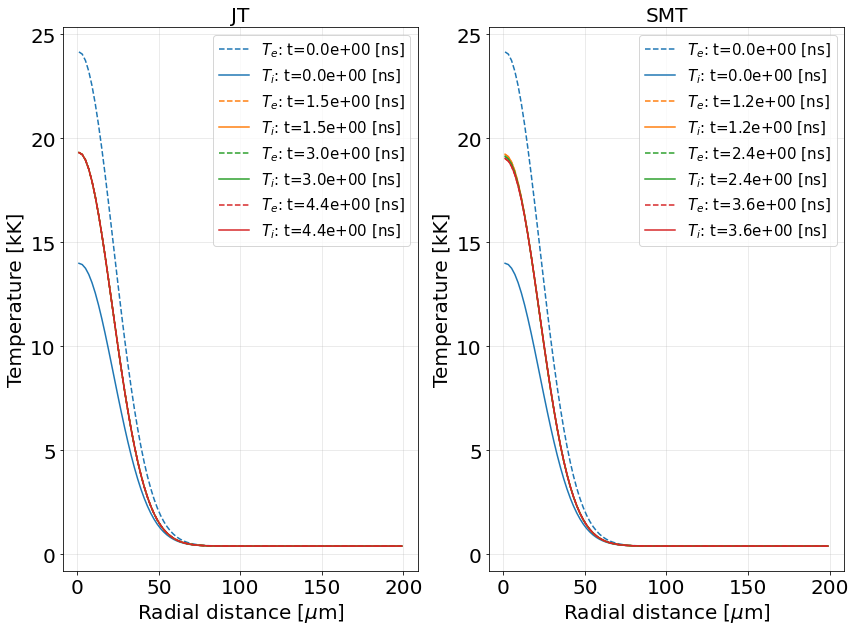

In [9]:
fig, ax = plt.subplots(1,2, figsize=(14,10),facecolor='w')

plot_temp_profiles(ttm_jt, grid, ax = ax[0], title='JT')
plot_temp_profiles(ttm_smt, grid, ax = ax[1], title='SMT')


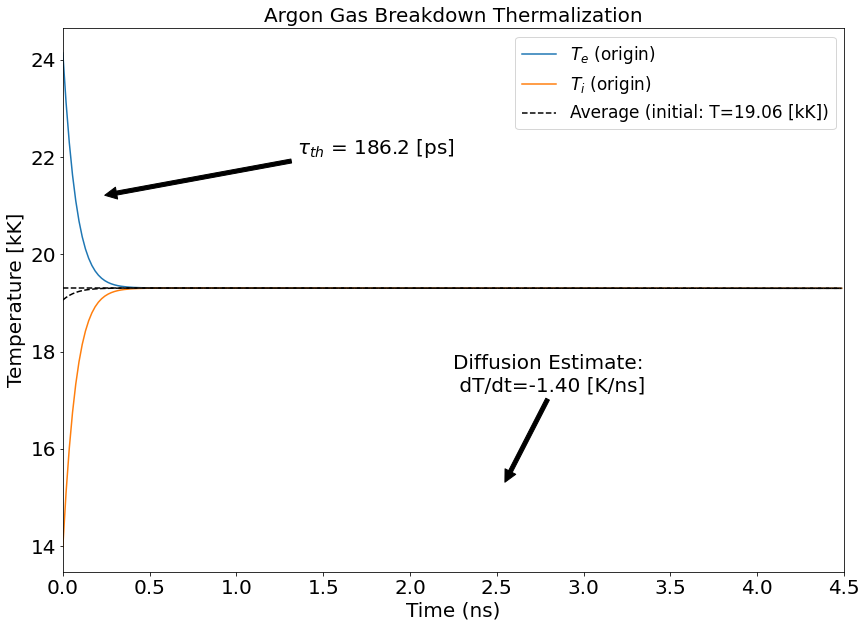

In [10]:
ttm  = ttm_jt
fig, ax = plt.subplots(figsize=(14,10),facecolor='w')

ti_1, ti_2 = -20000, -1
ti_1, ti_2 = -100, -1
T_av_1 = (ttm.Ti_list[ti_1][0] + ttm.Te_list[ti_1][0] )/2
T_av_2 = (ttm.Ti_list[ti_2][0] + ttm.Te_list[ti_2][0] )/2
dT_dt  = (T_av_2 - T_av_1)/(ttm.t_list[ti_2] - ttm.t_list[ti_1])
T_eq_line  = np.array(T_av_1 + dT_dt*(ttm.t_list-ttm.t_list[ti_1]))

T_av = 0.5*(np.array(ttm.Te_list) + np.array(ttm.Ti_list))


ax.plot(np.array(ttm.t_list)*1e9, np.array(ttm.Te_list).T[0]*1e-3,label=r"$T_e$ (origin)")
ax.plot(np.array(ttm.t_list)*1e9, np.array(ttm.Ti_list).T[0]*1e-3,label=r"$T_i$ (origin)")
ax.plot(np.array(ttm.t_list)*1e9, T_eq_line*1e-3,'--k')#,label='Diffusion Estimate: dT/dt={0:.2f} [K/ns]'.format(dT_dt*1e-9))
ax.plot(np.array(ttm.t_list)*1e9, T_av[:,0]*1e-3,'--k',label='Average (initial: T={0:.2f} [kK])'.format(T_av[0,0]*1e-3))

ax.annotate(r'$\tau_{th}$' + ' = {0:.1f} [ps]'.format(ttm.experiment.τei_Equilibration*1e12), xy=(0.1, 0.6), xycoords='figure fraction',
            xytext=(0.3, .8), textcoords='axes fraction',
            va='top', ha='left',fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.02))

ax.annotate('Diffusion Estimate:\n dT/dt={0:.2f} [K/ns]'.format(dT_dt*1e-9), xy=(0.5, 0.2), xycoords='figure fraction',
            xytext=(0.5, .4), textcoords='axes fraction',
            va='top', ha='left',fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.02))


# Plot settings
ax.set_xlabel(r"Time (ns)", fontsize=20)
ax.set_ylabel("Temperature [kK]",fontsize=20)
ax.tick_params(labelsize=20)
ax.set_xlim(0,ttm.tmax*1e9)

ax.set_title('Argon Gas Breakdown Thermalization',fontsize=20)
ax.legend(fontsize=17)
plt.show()

### Bulk Temperature Measurement

In [ ]:
width_index = np.argmin(np.abs(grid.r - Argon.laser_width))

Te_bulks = np.array([  grid.integrate_f(Te[:-1]*ttm.n_e[:-1], endpoint=width_index)/grid.integrate_f(ttm.n_e[:-1], endpoint=width_index) for Te in ttm.Te_list])
Ti_bulks = np.array([  grid.integrate_f(Ti[:-1]*ttm.n_i[:-1], endpoint=width_index)/grid.integrate_f(ttm.n_i[:-1], endpoint=width_index) for Ti in ttm.Ti_list])
T_av = 0.5*(Te_bulks + Ti_bulks)


In [ ]:
Te_bulks, Ti_bulks, T_av

In [ ]:
ttm.Te_list[0][width_index]

In [ ]:
fig, ax = plt.subplots(figsize=(14,10),facecolor='w')


# ti_1, ti_2 = -20000, -1
ti_1, ti_2 = -100, -1

T_av_1 = T_av[ti_1]
T_av_2 = T_av[ti_2]

dT_dt  = (T_av_2 - T_av_1)/(ttm.t_list[ti_2] - ttm.t_list[ti_1])

T_eq_line  = np.array(T_av_1 + dT_dt*(ttm.t_list-ttm.t_list[ti_1]))


ax.plot(np.array(ttm.t_list)*1e9, Te_bulks*1e-3,label=r"$T_e$ (bulk)")
ax.plot(np.array(ttm.t_list)*1e9, Ti_bulks*1e-3,label=r"$T_i$ (bulk)")
ax.plot(np.array(ttm.t_list)*1e9, T_eq_line*1e-3,'--k')#,label='Diffusion Estimate: dT/dt={0:.2f} [K/ns]'.format(dT_dt*1e-9))
ax.plot(np.array(ttm.t_list)*1e9, T_av*1e-3,'-k',label='Average (initial: T={0:.2f} [kK])'.format(T_av[0]*1e-3))

ax.annotate(r'$\tau_{th}$' + ' = {0:.1f} [ps]'.format(ttm.experiment.τei_Equilibration*1e12), xy=(0.1, 0.6), xycoords='figure fraction',
            xytext=(0.3, .8), textcoords='axes fraction',
            va='top', ha='left',fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.02))

ax.annotate('Diffusion Estimate:\n dT/dt={0:.2f} [K/ns]'.format(dT_dt*1e-9), xy=(0.5, 0.2), xycoords='figure fraction',
            xytext=(0.5, .4), textcoords='axes fraction',
            va='top', ha='left',fontsize=20,
            arrowprops=dict(facecolor='black', shrink=0.02))


# Plot settings
ax.set_xlabel(r"Time (ns)", fontsize=20)
ax.set_ylabel("Temperature [kK]",fontsize=20)
ax.tick_params(labelsize=20)
ax.set_xlim(0,ttm.tmax*1e9)

ax.set_title('Argon Gas Breakdown Thermalization',fontsize=20)
ax.legend(fontsize=17)
plt.show()